## Predicting Survival on the Titanic

### Assignment submitted by Neil Dave (23PGAI0049)

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

#### References:

Taken references from Class Notebook for this assignment.

In [203]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [204]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [205]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [206]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [207]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [208]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [209]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs
5,1,1,male,48.0000,0,0,26.5500,E12,S,Mr
6,1,1,female,63.0000,1,0,77.9583,D7,S,Miss
7,1,0,male,39.0000,0,0,0.0000,A36,S,Mr
8,1,1,female,53.0000,2,0,51.4792,C101,S,Mrs
9,1,0,male,71.0000,0,0,49.5042,NaN,C,Mr


In [210]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [211]:
target = 'survived'

In [212]:
vars_cat = [var for var in data.columns if data[var].dtype == 'O'] # fill your code here

vars_num = [var for var in data.columns if var not in vars_cat and var != 'survived'] # fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))
print(vars_num)
print('Number of categorical variables: {}'.format(len(vars_cat)))
print(vars_cat)

Number of numerical variables: 5
['pclass', 'age', 'sibsp', 'parch', 'fare']
Number of categorical variables: 4
['sex', 'cabin', 'embarked', 'title']


### Find missing values in variables

In [213]:
# first in numerical variables

# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

num_na = [var for var in vars_num if var in vars_with_na]
print(data[num_na].isnull().mean().sort_values(ascending=False))

print('Number of numerical variables with na: ', len(num_na))
print('Total Numerical variables where missing values present:',num_na)

age     0.200917
fare    0.000764
dtype: float64
Number of numerical variables with na:  2
Total Numerical variables where missing values present: ['age', 'fare']


In [214]:
# now in categorical variables

cat_na = [var for var in vars_cat if var in vars_with_na]

print(data[cat_na].isnull().mean().sort_values(ascending=False))

print('Number of categorical variables with na:', len(cat_na))
print('Total Numerical variables where missing values present:',cat_na)

cabin       0.774637
embarked    0.001528
dtype: float64
Number of categorical variables with na: 2
Total Numerical variables where missing values present: ['cabin', 'embarked']


### Determine cardinality of categorical variables

sex           2
cabin       181
embarked      3
title         5
dtype: int64


<AxesSubplot: >

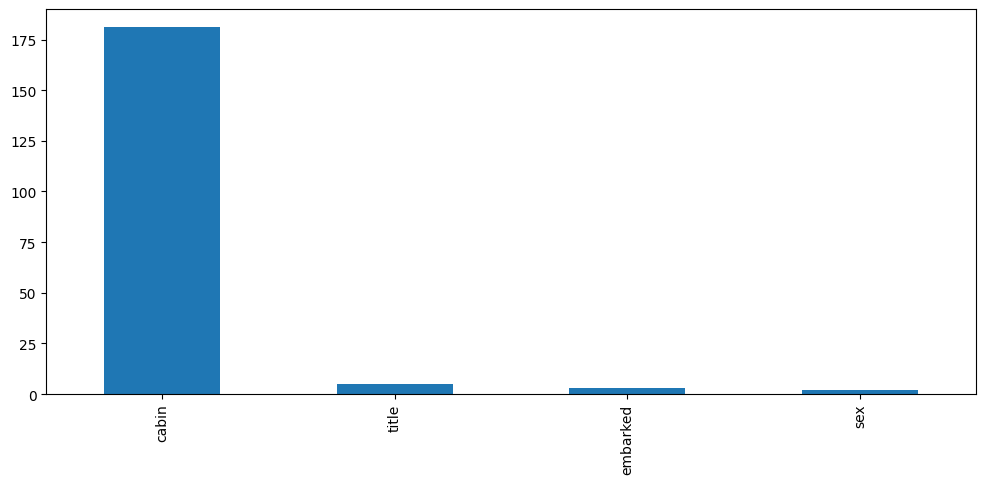

In [215]:
print(data[vars_cat].nunique())
data[vars_cat].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

### Determine the distribution of numerical variables

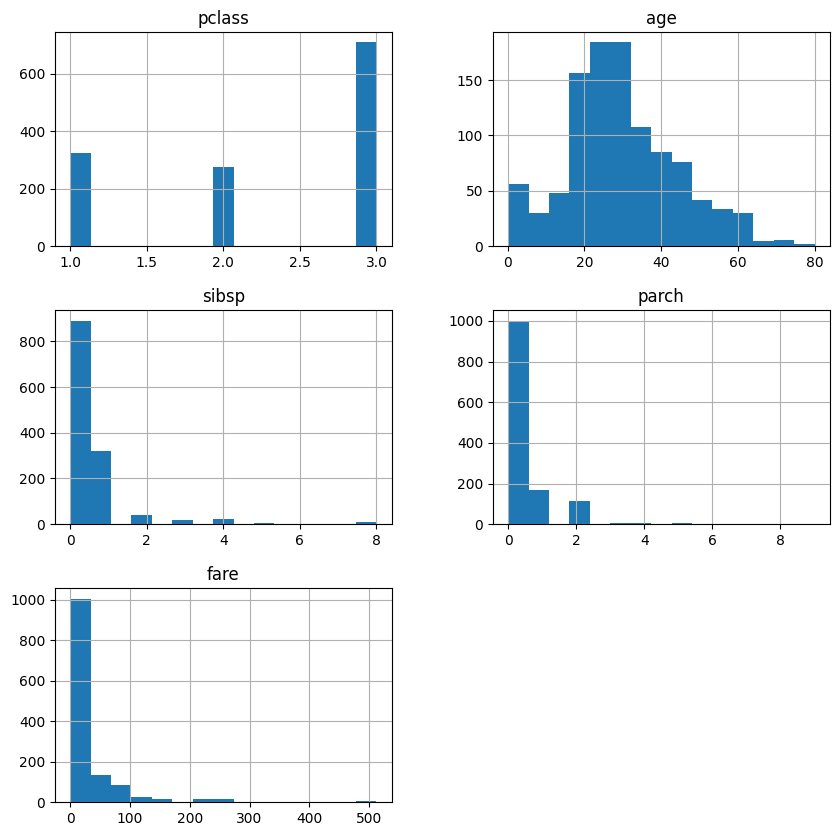

In [216]:
# vars_num
data[vars_num].hist(bins=15, figsize=(10,10))
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [217]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [218]:
# data['cabin'] = data['cabin'].str.replace('\d+', '')
# data['cabin']

X_train['cabin'] = X_train['cabin'].str.replace('\d+', '') #captures the first letter
X_test['cabin'] = X_test['cabin'].str.replace('\d+', '') #captures the first letter
# X_train['cabin'].unique()


C:\Users\neild\AppData\Local\Temp\ipykernel_22324\1412237020.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['cabin'] = X_train['cabin'].str.replace('\d+', '') #captures the first letter
C:\Users\neild\AppData\Local\Temp\ipykernel_22324\1412237020.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['cabin'] = X_test['cabin'].str.replace('\d+', '') #captures the first letter


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [219]:
print('Numeric Variables:',vars_num)
print('Numeric variable with missing values:',num_na)
print('Age missing values:',data['age'].isnull().sum())

X_train['fare'] = X_train['fare'].fillna(data['fare']).median()
X_test['fare'] = X_test['fare'].fillna(data['fare']).median()
X_train['age'] = X_train['age'].fillna(data['age']).median()
X_test['age'] = X_test['age'].fillna(data['age']).median()
print('Missing value post filling value with median:', X_train [['age','fare']].isnull().sum())
print('Missing value post filling value with median:', X_test [['age','fare']].isnull().sum())

Numeric Variables: ['pclass', 'age', 'sibsp', 'parch', 'fare']
Numeric variable with missing values: ['age', 'fare']
Age missing values: 263
Missing value post filling value with median: age     0
fare    0
dtype: int64
Missing value post filling value with median: age     0
fare    0
dtype: int64


### Replace Missing data in categorical variables with the string **Missing**

In [220]:
X_train[vars_cat] = X_train[vars_cat].fillna('Missing')
X_test[vars_cat] = X_test[vars_cat].fillna('Missing')

In [221]:
X_train.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
dtype: int64

In [222]:
X_test.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [226]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    copy = df.groupby(var)[var].count() / len(df)

    # return categories that are rare
    return copy[copy > rare_perc].index

# print categories that are present in less than
# 1 % of the observations

for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = analyse_rare_labels(X_train, var, 0.05)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

In [229]:
X_train[vars_cat].nunique()

sex         2
cabin       3
embarked    4
title       4
dtype: int64

In [230]:
X_test[vars_cat].nunique()


sex         2
cabin       3
embarked    3
title       4
dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [231]:
for var in vars_cat: 
    X_train = pd.concat([X_train,pd.get_dummies(X_train[var], prefix=var, drop_first=True)], axis=1)
    
    X_test = pd.concat([X_test,pd.get_dummies(X_test[var], prefix=var, drop_first=True)], axis=1)
    
X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)

X_train.shape, X_test.shape

((1047, 14), (262, 13))

In [232]:
X_train.sample(5)


,pclass,age,sibsp,parch,fare,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
375,2,28.0,0,0,14.4542,1,1,0,0,0,1,1,0,0
1230,3,28.0,0,1,14.4542,0,0,1,0,0,1,0,0,0
777,3,28.0,0,0,14.4542,1,1,0,0,0,1,1,0,0
854,3,28.0,0,0,14.4542,1,1,0,1,0,0,1,0,0
449,2,28.0,1,3,14.4542,0,1,0,0,0,1,0,1,0


In [200]:
X_test.sample(5)

,pclass,age,sibsp,parch,fare,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
814,3,26.0,0,0,15.01665,1,1,0,1,0,1,0,0
773,3,26.0,0,0,15.01665,1,1,0,0,1,1,0,0
938,3,26.0,1,1,15.01665,1,1,0,0,1,1,0,0
1028,3,26.0,1,0,15.01665,0,1,0,1,0,0,0,0
853,3,26.0,0,0,15.01665,1,1,0,0,1,1,0,0


In [233]:
X_test['embarked_Rare'] = 0

variables = [var  for var in X_train.columns]

variables

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare']

### Scale the variables

- Use the standard scaler from Scikit-learn

In [234]:
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[variables]) 

X_train = pd.DataFrame(
    scaler.transform(X_train[variables]),
    columns=X_train.columns
)

X_test = pd.DataFrame(
    scaler.transform(X_test[variables]),
    columns=X_train.columns
)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [236]:

log_model = LogisticRegression(C=0.0005, random_state=0)

# train the model

log_model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [239]:
# make predictions for test set
class_ = log_model.predict(X_train)
pred = log_model.predict_proba(X_train)[:,1]

# evaluation metrics for training set
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = log_model.predict(X_test)
pred = log_model.predict_proba(X_test)[:,1]

# evaluation metrics for testing set
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.8406993817619783
train accuracy: 0.7039159503342884

test roc-auc: 0.8430864197530864
test accuracy: 0.6946564885496184



That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**